In [ ]:
from IPython.display import Image
from IPython.display import clear_output
from IPython.display import FileLink, FileLinks

<img src="img/python-logo-master-flat.png" alt="Python Logo" style="width: 120px; float: right; margin: 0 0 10px 10px;" />

## Introduction to Python with Application in Bioinformatics



### Nanjiang Shu

#### 2024-07-19 (Day 5)

### Review of Day 4

- Scop of variables
    - Local variables vs global variables and at which scope they are accessible
    - Be cautious when using global variables.
- Positional arguments and keyword arguments
    - Positional arguments and keyword arguments are passed differently to the functions
    - Use keyword arguments to improve the clarity.
- `return` statement
    - Functions return a meaningful value are easier to repurpose and more usable.
- Comments and documentation
    - How to create your own module with both module level documentation and help message for functions
    - Although code should explain by itself, comment the code when it's hard to understand.
- Importing modules: using libraries
    - import os
    - from math import pi
- Brief introduction to Biopython using `SeqIO`

### Review of the quiz from Day 4
- <a href="https://forms.office.com/Pages/DesignPageV2.aspx?origin=NeoPortalPage&subpage=design&id=DQSIkWdsW0yxEjajBLZtrQAAAAAAAAAAAAa__Yehr4dUQkVYOVlONlNIVEVZRTEyUTAwT0s0SzgzTy4u&analysis=true">Link to the quiz statistics</a>

### Question 2:
If a local variable shares the same name as a global variable, which will be used within the function?
```
   A: The function will use the global variable
✔  B: The function will use the local variable
   C: Python will throw an error
   D: It will choose randomly
```
Wrong answers: many B, a few C

In [439]:
def show_host():
    host = 'local'
    print(f'host inside the function = {host}')
    
host = 'global'
show_host()

host inside the function = local


## Day 5

- Session 1:
    - Pandas for data manipulation and basic plotting
- Session 2: 
    - An introduction to AI assisted programming

- Sum up

Project time after lunch

## Pandas
- Library for working with tabular data, e.g. csv, tsv and excel
- Data analysis: 
   - filtering 
   - transformation, that is, element wise data mapping
   - aggregation, that is, combining or summerizing data
   - plotting

### In Padas, data is stored as a `DataFrame`


![01_table_dataframe1](img/01_table_dataframe1.png)

### Creating a DataFrame

In [442]:
import pandas as pd
mydict = {
    'age': [1,2,3,4],
    'circumference': [2,3,5,10],
    'height': [30, 35, 40, 50]
}
df = pd.DataFrame(mydict)
df

,age,circumference,height
0,1,2,30
1,2,3,35
2,3,5,40
3,4,10,50


- One column of implict row index (0, 1, 2, 3) is added
- Keys are treated as column names: `age`, `circumference`, `height`

In [443]:
# To set 'age', ''circumference' and 'height' as rows, you need to transpose the matrix
df.T

,0,1,2,3
age,1,2,3,4
circumference,2,3,5,10
height,30,35,40,50


### Reset the index names

In [444]:
df = pd.DataFrame(mydict)
print(df)
df = pd.DataFrame(mydict, index=["row1", "row2", "row3", "row4"])
df

   age  circumference  height
0    1              2      30
1    2              3      35
2    3              5      40
3    4             10      50


,age,circumference,height
row1,1,2,30
row2,2,3,35
row3,3,5,40
row4,4,10,50


### Reset the index names after creation

In [446]:
df = pd.DataFrame(mydict)
print(df)
df = df.rename(index={0:"row1"})
df

   age  circumference  height
0    1              2      30
1    2              3      35
2    3              5      40
3    4             10      50


,age,circumference,height
row1,1,2,30
1,2,3,35
2,3,5,40
3,4,10,50


### Reset the column names

In [448]:
df = pd.DataFrame(mydict)
print(df)
df = df.rename(columns={"age": "newAge"})
df

   age  circumference  height
0    1              2      30
1    2              3      35
2    3              5      40
3    4             10      50


,newAge,circumference,height
0,1,2,30
1,2,3,35
2,3,5,40
3,4,10,50


In [ ]:
df.columns = ["1", "2", "3"]
df

### You can not reset column names duration its creation

In [449]:
# However, you can not reset column names duration it's creation
df = pd.DataFrame(mydict, columns=["newAge", "NewC", "NewH"])
df

,newAge,NewC,NewH


#### This is because when you define the DataFrame the keys in the dictionary must match the column names exactly when passed to `pd.DataFrame()`

### The data of columns must have the same length 

In [452]:
mydict = {
    'age': [1,2,3,4],
    'circumference': [2,3,5,10],
    'height': [30, 35, 40, 50]
}
df = pd.DataFrame(mydict)
df

,age,circumference,height
0,1,2,30
1,2,3,35
2,3,5,40
3,4,10,50


### Overview of your data, basic statistics

In [453]:
df

,age,circumference,height
0,1,2,30
1,2,3,35
2,3,5,40
3,4,10,50


In [454]:
df.shape

(4, 3)

In [455]:
df.describe()

,age,circumference,height
count,4.000000,4.000000,4.000000
mean,2.500000,5.000000,38.750000
std,1.290994,3.559026,8.539126
min,1.000000,2.000000,30.000000
25%,1.750000,2.750000,33.750000
50%,2.500000,4.000000,37.500000
75%,3.250000,6.250000,42.500000
max,4.000000,10.000000,50.000000


In [456]:
df.max()

age               4
circumference    10
height           50
dtype: int64

In [ ]:
df.std()

### Numerical options will be applied on every element

In [459]:
print(df)
(df+2)*2-1

   age  circumference  height
0    1              2      30
1    2              3      35
2    3              5      40
3    4             10      50


,age,circumference,height
0,5,7,63
1,7,9,73
2,9,13,83
3,11,23,103


Note: sometimes we don't want to run statistics on the whole dataset but only part of the data

## How to select data from a DataFrame

###  Selecting columns from a dataframe
```python
dataframe.columnname
dataframe['columnname']
```
<img src="img/03_subset_columns.png" alt="subset columns" style="width: 400px; float: right; margin: 0 0 10px 10px;"/>



0    30
1    35
2    40
3    50
Name: height, dtype: int64

In [ ]:
df.0 # does not work if the column name is an integer

In [ ]:
# create a new dataframe from the selected dataframe and do further operations
df_new = df.height

### Selecting multiple columns

In [463]:
df[['age', 'height']]

,age,height
0,1,30
1,2,35
2,3,40
3,4,50


In [464]:
df[['height', 'age']] # what's the difference?

,height,age
0,30,1
1,35,2
2,40,3
3,50,4


### Selecting rows from a dataframe
- __Using integer index__
```py
dataframe.iloc[index]
dataframe.iloc[start:stop]
```
<img src="img/03_subset_rows.png" alt="subset columns" style="width: 400px; float: right; margin: 0 0 10px 10px;"/>

In [467]:

df.iloc[0] # select the first row

age               1
circumference     2
height           30
Name: 0, dtype: int64

In [468]:
df.iloc[1:3] # select from row 2 to 3

,age,circumference,height
1,2,3,35
2,3,5,40


### Selecting rows from a dataframe 
- __Using label index__
```py
dataframe.loc[row_label]
dataframe.loc[start_label:end_label] (both ends are inclusive)
```
<img src="img/03_subset_rows.png" alt="subset columns" style="width: 400px; float: right; margin: 0 0 10px 10px;"/>

In [470]:
df = df.rename(index={0:"row1", 1:"row2", 2:"row3", 3:"row4"})
print(df)
df.loc['row1'] # select from row 1

      age  circumference  height
row1    1              2      30
row2    2              3      35
row3    3              5      40
row4    4             10      50


age               1
circumference     2
height           30
Name: row1, dtype: int64

In [471]:
df.loc['row1':'row3'] # select from row 1 to 3

,age,circumference,height
row1,1,2,30
row2,2,3,35
row3,3,5,40


In [472]:
df.loc[['row1', 'row3']] # select row 1 and row 3

,age,circumference,height
row1,1,2,30
row3,3,5,40


In [473]:
df.loc[['row3', 'row2']] # select row 2 and row3, order changed

,age,circumference,height
row3,3,5,40
row2,2,3,35


### Selecting top and bottom rows by `.head` and `.tail`

In [474]:
df.head(2)

,age,circumference,height
row1,1,2,30
row2,2,3,35


In [475]:
df.tail(2)

,age,circumference,height
row3,3,5,40
row4,4,10,50


### Selecting rows by condition


In [476]:
df[df['height'] >= 40]

,age,circumference,height
row3,3,5,40
row4,4,10,50


In [477]:
df[(df['height'] == 40) & (df['circumference'] <= 10)]

,age,circumference,height
row3,3,5,40


## Selecting both columns and rows
<img src="img/03_subset_columns_rows.png" alt="subset columns" style="width: 400px; float: right; margin: 0 0 10px 10px;"/>

### Selecting both columns and rows by using integer index
```python
dataframe.iloc[row_index, col_index]
dataframe.iloc[row_start:row_stop, col_start:col_stop]
```

In [478]:
print(df)
df.iloc[2, 2]

      age  circumference  height
row1    1              2      30
row2    2              3      35
row3    3              5      40
row4    4             10      50


40

In [479]:
df.iloc[:, 1:3]

,circumference,height
row1,2,30
row2,3,35
row3,5,40
row4,10,50


### Selecting both columns and rows by using label index
```python
dataframe.loc[row_label, col_label]
dataframe.loc[row_start_label:row_stop_label, col_label]
```

In [ ]:
df.loc['row1', 'age']

In [ ]:
df.loc['row1':'row3' , ['age', 'height']]

### Run statistics on selected data
- Since the return value of the selected data is also a `DataFrame`, we can run all aggregation statistics on that

In [480]:
# calculate the mean value of age
df['age'].mean()

2.5

In [481]:
# calculate std of height for row1 to row3
df.loc["row1":"row3", 'height'].std()

5.0

## Expand a DataFrame 
We can reduce the size of a dataframe by selecting, but can also expand it.

### Creating a new column derived from existing columns
<img src="img/05_newcolumn_1.png" alt="subset columns" style="width: 400px; float: right; margin: 0 0 10px 10px;"/>

In [482]:
from math import pi
df['radius'] = df['circumference'] / (2*pi)
df

,age,circumference,height,radius
row1,1,2,30,0.318310
row2,2,3,35,0.477465
row3,3,5,40,0.795775
row4,4,10,50,1.591549


### Add new rows by `.concat`

In [485]:
new_dt = {
    'age': [5,6],
    'circumference':[8,9],
    'height': [45,46],
    'radius': [8/2/pi, 9/2/pi]
}
new_rows = pd.DataFrame(new_dt)
df = pd.concat([df, new_rows])
df

,age,circumference,height,radius,age,circumference,height,radius
row1,1,2,30,0.318310,NaN,NaN,NaN,NaN
row2,2,3,35,0.477465,NaN,NaN,NaN,NaN
row3,3,5,40,0.795775,NaN,NaN,NaN,NaN
row4,4,10,50,1.591549,NaN,NaN,NaN,NaN
0,5,8,45,1.273240,5.0,8.0,45.0,1.273240
1,6,9,46,1.432394,6.0,9.0,46.0,1.432394
0,5,8,45,1.273240,5.0,8.0,45.0,1.273240
1,6,9,46,1.432394,6.0,9.0,46.0,1.432394


Note: In the previous examples, we provide data to the dataframe in the code. but in reality, data is usually located in the external files. Pandas provides a flexible way to import data from many formats.

### Pandas can import data from many formats

- `pd.read_table`: tab separated values `.tsv`
- `pd.read_csv`: comma separated values `.csv`
- `pd.read_excel`: Excel spreadsheets `.xlsx`

- For a data frame `df`: `df.to_table()`, `df.to_csv()`, `df.to_excel()`

![test](img/02_io_readwrite.png)

### Read from Excel file

Note: the default sheet_name is "Sheet1", for using a different sheet name, 
df1 = pd.read_excel(excel_file, index_col=0, sheet_name="Sheet2")

In [487]:
excel_file = "../downloads/Orange_1.xlsx"
df1 = pd.read_excel(excel_file, index_col=0, sheet_name="Sheet2")
df1

,age,circumference,height
0,1,2,30
1,2,3,35
2,3,5,40
3,4,10,50
4,3,6,40
5,10,24,200


In [ ]:
# read from a different sheet
df1 = pd.read_excel(excel_file, index_col=0, sheet_name="Sheet2")
df1

### Demo with a slightly bigger orange trees data

In [524]:
df = pd.read_table('../downloads/Orange.tsv')
df

,Tree,age,circumference
0,1,118,30
1,1,484,58
2,1,664,87
3,1,1004,115
4,1,1231,120
5,1,1372,142
6,1,1582,145
7,2,118,33
8,2,484,69
9,2,664,111


In [493]:
df['Tree'].unique()

array([1, 2, 3])

In [494]:
df[df['Tree'] == 1]

,Tree,age,circumference
0,1,118,30
1,1,484,58
2,1,664,87
3,1,1004,115
4,1,1231,120
5,1,1372,142
6,1,1582,145


In [ ]:
#young = df[df.age < 200]
#young
df[df.age < 1000]

### Small exercise 1
Find the maximal circumference and then filter the dataframe by it

In [ ]:
df.head()

In [495]:
max_c = df['circumference'].max()
print(max_c)

203


In [497]:
df[df.circumference == df['circumference'].max()]

,Tree,age,circumference
12,2,1372,203
13,2,1582,203


## Small exercise 2

Here's a dictionary of students and their grades:
```
students = {'student': ['bob', 'sam', 'joe'], 'grade': [1, 3, 4]}
```
Use Pandas to:
- create a dataframe with this information
- get the mean value of the grades

In [499]:
import pandas as pd

students = {'student': ['bob', 'sam', 'joe'], 'grade': [1, 3, 4]}

df = pd.DataFrame(students)
print(df)
df['grade'].mean()

  student  grade
0     bob      1
1     sam      3
2     joe      4


2.6666666666666665

### Plotting
```py
df.columnname.plot()
```

In [500]:
df_small = pd.read_table('../downloads/Orange_1.tsv')
df_small

,age,circumference,height
0,1,2,30
1,2,3,35
2,3,5,40
3,4,10,50


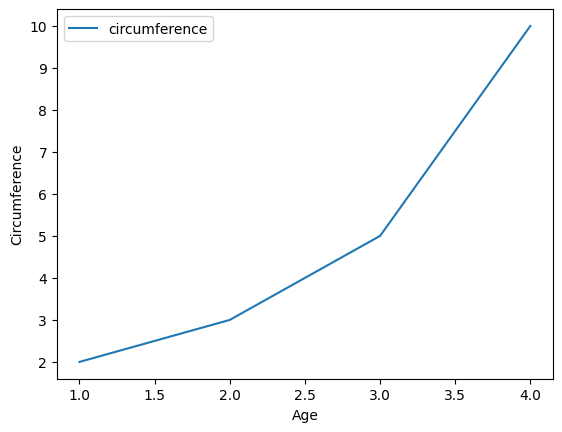

In [506]:
 # Plot the relationship of age and height with the line plot
df_small.plot(x='age', y='circumference', kind='line', xlabel="Age", ylabel="Circumference")
df_small.plot

<Axes: xlabel='age', ylabel='circumference'>

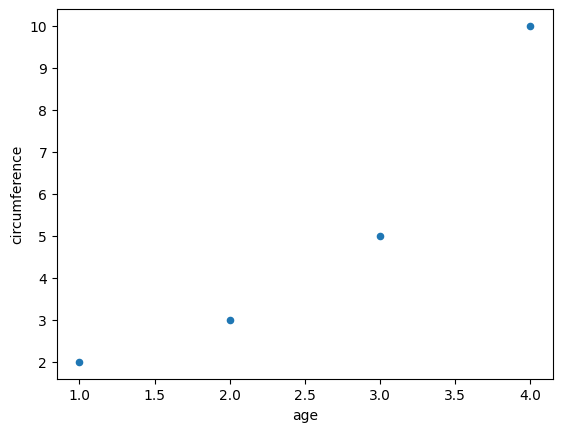

In [508]:
# scatter plot
df_small.plot(x='age', y='circumference', kind='scatter') 

### Tips: what if no plot shows up?

In [ ]:
import matplotlib.pyplot as plt
plt.show()
%matplotlib inline

### Bar plot
```python
df.plot(kind="bar")
```

<Axes: ylabel='Age'>

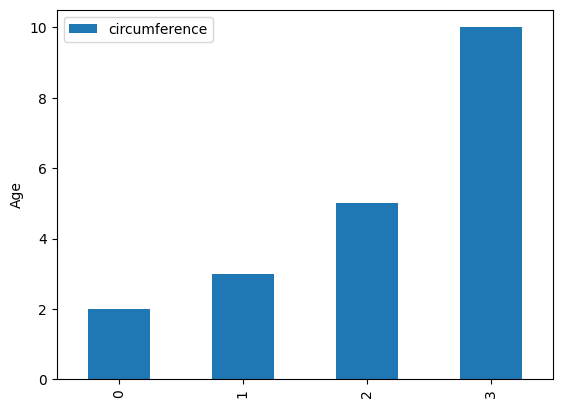

In [510]:
df_small[['circumference']].plot(kind='bar', ylabel="Age")

### Plotting multiple columns

<Axes: >

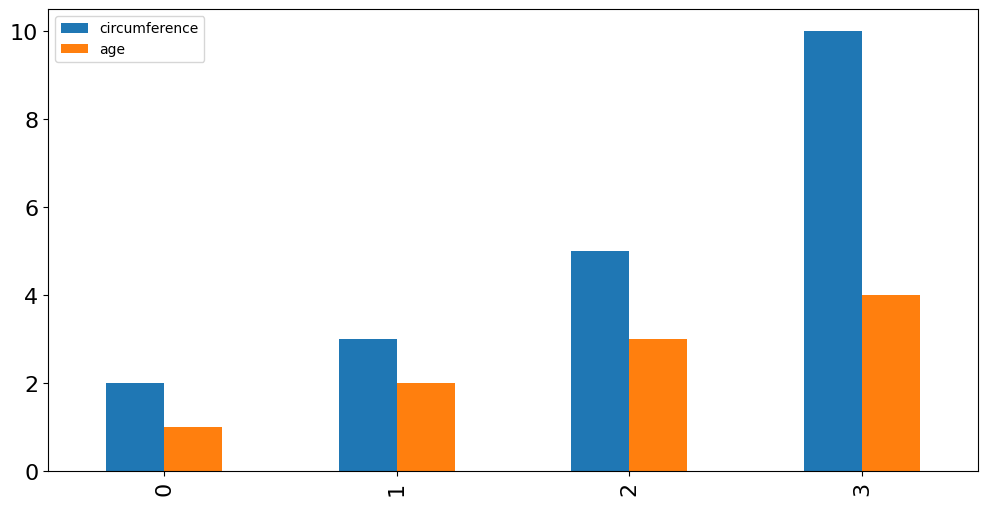

In [512]:
df_small[['circumference', 'age']].plot(kind='bar', figsize=(12, 6), fontsize=16)

### Histogram plot

<Axes: ylabel='Frequency'>

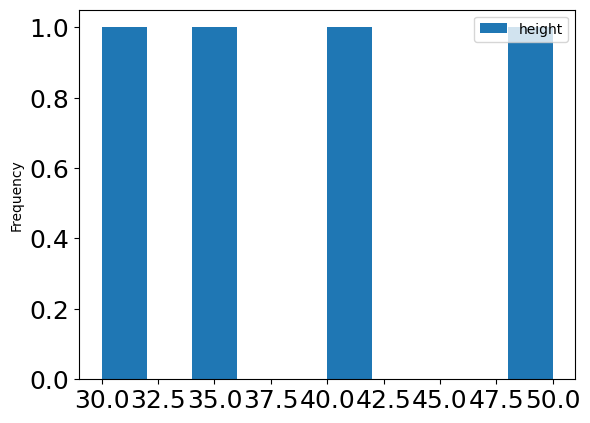

In [518]:
df_small.plot(kind='hist', y = 'height', fontsize=18)

### Box plot

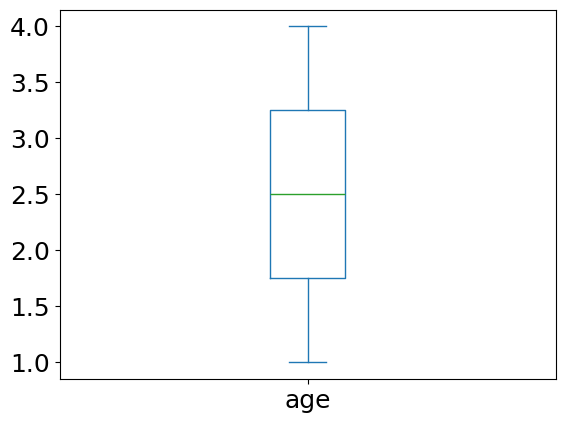

In [522]:
df_small.plot(kind='box', y = 'age', fontsize=18)
df_small.plot

### Multiple graphs - grouping

In [526]:
df.groupby('Tree')

Tree
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
dtype: object

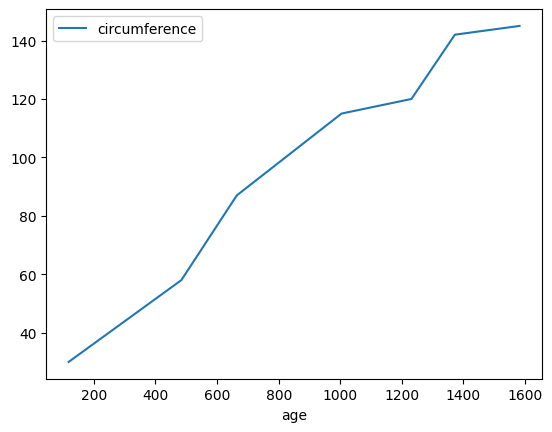

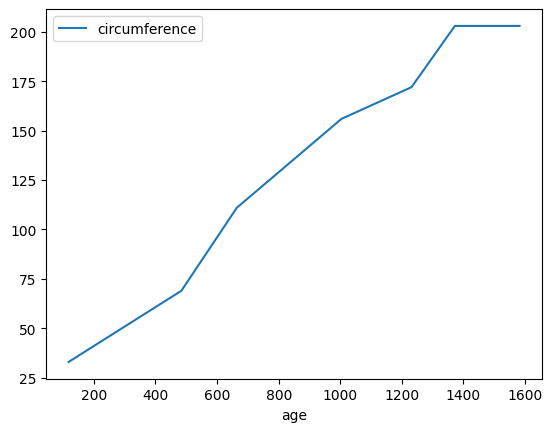

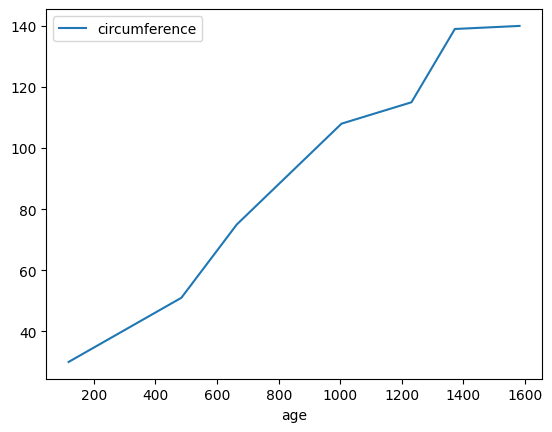

In [527]:
df.groupby('Tree').plot(kind="line", x='age', y='circumference')

In [528]:
tree3 = df.groupby('Tree').get_group(3)

<Axes: xlabel='age'>

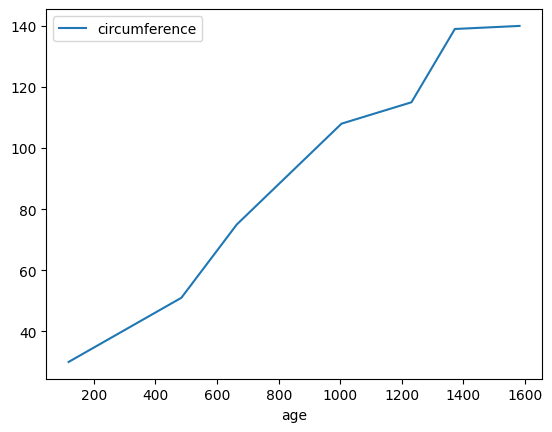

In [529]:
tree3.plot(kind='line', x='age', y='circumference')

In [530]:
df.groupby('Tree').groups

{1: [0, 1, 2, 3, 4, 5, 6], 2: [7, 8, 9, 10, 11, 12, 13], 3: [14, 15, 16, 17, 18, 19, 20]}

### Take a break
___
## Day 5, Exercise 1
- Link: https://python-bioinfo.bioshu.se/exercises.html

## Introduction to AI assisted programming

The field of Artificial Intelligence (AI) has experienced a remarkable surge in popularity, largely driven by breakthroughs in Large Language Models (LLMs). ChatGPT, developed by OpenAI, stands out as one of the most prominent examples of this technology. Similarly, China's tech ecosystem has introduced its own formidable AI chatbot, Wenxin Yiyan, showcasing the global interest and advancements in AI.

Just as search engines like Google have made traditional library searches and leafing through dictionaries obsolete, AI systems, epitomized by platforms like ChatGPT, are set to fundamentally transform our methods of working, learning, and teaching.

As these tools become an integral part of the technological landscape, embracing and integrating them into our practices is not only beneficial—it's imperative for staying at the forefront of innovation. Let's explore how AI can enhance the bioinformatics field and how we can harness its full potential in our work.

### (AI) Artificial Intelligence: A Global Phenomenon

<img src="img/Chatgpt-Users-Growth.png" alt="User Growth" style="floating: right;width: 500px;"/> 

- The market price for Nvidia has once overtake Microsoft and became the most valuable company in the world.
- Every grant application has a higher chance to be accepted if it talks about AI
- The number of users has reached over 100 million now
- Threads is a social media conversation tool backed up by Facebook instgram etc

## What AI can do
- Helping with decision-making, automation, and data analysis.
- Creating Art work
- Assisting in health care
- Self-driving car 
- Serving as a good friend, mentor
- __Helping with programmming__ (this is what we care in this course)

Note: Let's take a look at the function that we have used as example during the course 
get_seqlen

I copy the instruction in the AI bot


## AI can program when instructed with natural language

### Task:

Write a standalone Python script that calculate sequence length given a fasta file, it can take a fasta file as input from the command line and output the result

#### Input the above instruction to both Baidu Yiyan and ChatGPT. 

## Rephrase the prompt run again

I have a sequence file in fasta format. The file may contain multiple sequences. Write a Python script that can take the sequence as an argument from the command line and print the result in the following format

seqid seqlength

## For more complicated tasks, AI may not generate the code that you can directly use

### Task:

I have sequenced the whole genome of a patient using Illumina. The raw data are in these fastq files. 
Write python script to assemble these into a whole genome and annotate it.
also find all biomarkers that are related to type 2 diabetes.




### A practical procedure 

<img src="img/work-with-AI-flowchart.png" alt="AI flowchart" style="floating: right;width: 500px;"/> 

- There is actually a type of job: __prompt engineer__ - designs and refines prompts for LLMs to accomplish the tasks 

### AI can be integrated into the text editors, e.g. 

- Github Copilot
    - developed by GitHub in collab with OpenAI
    - provides context-aware code suggestions 
    - help writing code, debugging
- IntelliCode
    - by Microsoft
    - provides context-aware code suggestions
- Tabnine
    - code completion tool
- Kite
    - helps with code completion, error correction, and code navigation

It can generate or predict the code while you are programming 


### Demo with Github Copilot using VScode

Code from WenXinYiDian does not use the seqID properly, instead if used the whole description line as SeqID

ChatGPT not only show the code with BioPython properly but also give explanations and exampels. 

Understanding the fundamentals of Python, or any programming language, remains crucial even in the era of AI-assisted coding. Here are several reasons why:

### Why do we still need to learn Python if AI can program?

- AI has limitations and can generate incorrect or suboptimal code
    - Understanding the fundamentals allows you to identify, troubleshoot, and fix these issues.
- Learning programming fundamentals helps develop problem-solving skills and algorithmic thinking
    - You need to guide AI with algorithmic thinking so that AI can generate expected result
- AI still lacks true innovation 
    - It generates code based on existing patterns and data

Note: if all programmars are soly dependent on AI, code will be more and more alike

researchers can directly practice their idea with programs without the need to have laborous programming training

### Pros
- Increased productivity
- Improved accuracy - many typos and obvious errors will be eliminated
- AI makes programming accessible to those have little or no programming skills
  - Researcher without a solid programming trainning can directly practice their ideas with programs. 
### Cons
- Limited creativity
- Bias and inaccuracy 
- Replying too much on AI can cause people lack of imaginagtion and cirtical thinking. That is especially risky in education.

Note: do you still remember these figures I showed at the beginning of the course 

<div style="display: flex; flex-direction: column; align-items: center;">
  <img src="img/research_fields.png" style="max-width: 100%; height: auto; margin-bottom: 10px;" />
</div>


  <div style="display: flex; width: 100%; justify-content: space-between;">
    <img src="img/programming_experience.png" style="floating: left; width: 300px;" />
    <img src="img/bioinformatics_experience.png" style="floating: right; width: 450px;" />
  </div>

## Exercise (15 min)
Create the same figure using AI, given the Excel file <a href="https://python-bioinfo.bioshu.se/lectures/student_survey.xlsx">python-bioinfo.bioshu.se/lectures/student_survey.xlsx</a>

___
#### Take a short break before summary

## Summary

You have learned the fundermentals of Python and now you should be able to 

- Know how to write a Python script to acheive basic bioinformatics tasks 
- Know how to use the Python modules and packages to facilitate your coding task
- Know basics of data analysis and plotting with the Pandas module
- Know how to further develop your Python skills with numeras online tutorials and documentation

### Learning programming in the post-AI era

- With the emergency of AI tools, memorizing numerous modules and methods is less important than before (unless efficiency is key).
- The ability of decomposing tasks with algorithm thinking is more important. 
- A broad domain knowledge is essential for effectively instructing and leveraging AI tools.


Note:
- With the emergence of AI chatbot like ChatGPT, the effort to memorize the usage of numerous modules and methods is meaningless, unless efficiency is the main target of your programming.
- The ability to raise the question and suggest steps to solve the question is more important.
- It is important to build a broad domain knowledge to effectively instruct and leverage AI tools.

### The learning and forgetting curve
<img src="img/learning_curve.png" style="width: 600px;" />

- Use it in your research
- Discuss it with your colleagues
- AI as your learning parter


# Thank you!

Note: many thanks to the organiers, to all the brillant TAs and to you all who have been actively involved in learning and discussion during the past 5 days. Thank you very much!